In [1]:
import matplotlib.pyplot as plt
import gym
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.agents import DQNAgent
from rl.memory import SequentialMemory


2021-07-18 20:35:27.319785: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-18 20:35:27.319805: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def build_model(height, width, channels, actions):
    model = Sequential()
    model.add(Convolution2D(32, (8, 8), strides=(4, 4),
              activation='relu', input_shape=(3, height, width, channels)))
    model.add(Convolution2D(64, (4, 4), strides=(2, 2), activation='relu'))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model


In [3]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(
    ), attr='eps', value_max=1, value_min=.1, value_test=.2, nb_steps=100000)
    memory = SequentialMemory(limit=10000, window_length=3)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                   enable_dueling_network=True, dueling_type='avg',
                   nb_actions=actions, nb_steps_warmup = 100000)
    return dqn

In [4]:
env = gym.make("Freeway-v0")
env = gym.wrappers.ResizeObservation(env, (88, 88))
height, width, channels = env.observation_space.shape
actions = env.action_space.n
model = build_model(height, width, channels, actions)


In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 21, 21, 32)     6176      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 9, 9, 64)       32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 7, 7, 64)       36928     
_________________________________________________________________
flatten (Flatten)            (None, 9408)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4817408   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 7

In [6]:
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=0.01))
log = dqn.fit(env, nb_steps=100000, visualize=True, verbose=2)

2021-07-18 20:36:03.972838: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-18 20:36:04.000258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-18 20:36:04.000478: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce MX110 computeCapability: 5.0
coreClock: 1.006GHz coreCount: 2 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 37.33GiB/s
2021-07-18 20:36:04.000549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-18 20:36:04.000603: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcubla

In [7]:
scores = dqn.test(env, nb_episodes = 10, visualize=True)
print(np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...
Episode 1: reward: 22.000, steps: 2726
Episode 2: reward: 22.000, steps: 2760
Episode 3: reward: 23.000, steps: 2759
Episode 4: reward: 23.000, steps: 2737
Episode 5: reward: 22.000, steps: 2725
Episode 6: reward: 25.000, steps: 2732
Episode 7: reward: 25.000, steps: 2750
Episode 8: reward: 23.000, steps: 2745
Episode 9: reward: 22.000, steps: 2723
Episode 10: reward: 23.000, steps: 2726
23.0


In [8]:
env.close()
dqn.save_weights('100K_dqn.h5f')

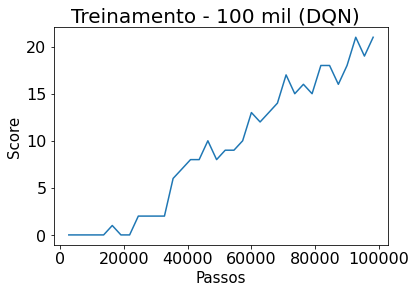

In [8]:
plt.figure()
plt.figtext(.5,.9,'Treinamento - 100 mil (DQN)', fontsize=20, ha='center')
plt.xlabel('Passos', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.plot(log.history['nb_steps'], log.history['episode_reward'])
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()

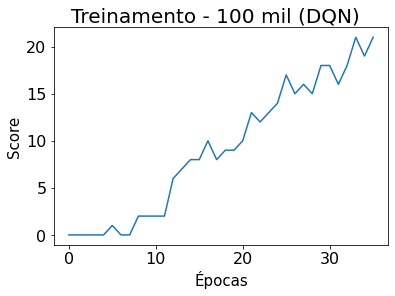

In [9]:
plt.figure()
plt.figtext(.5,.9,'Treinamento - 100 mil (DQN)', fontsize=20, ha='center')
plt.xlabel('Épocas', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.plot(log.epoch, log.history['episode_reward'])
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.show()

Text(0, 0.5, 'Score')

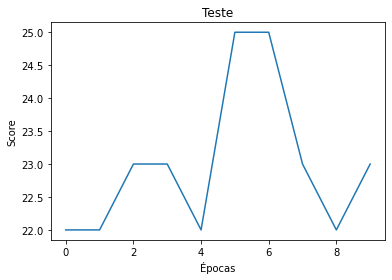

In [10]:
plt.plot(scores.epoch, scores.history['episode_reward'])
plt.title("Teste")
plt.xlabel("Épocas")
plt.ylabel("Score")

In [11]:
np.max(log.history['episode_reward'])

21.0

In [12]:
log.history

{'episode_reward': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  2.0,
  2.0,
  2.0,
  2.0,
  6.0,
  7.0,
  8.0,
  8.0,
  10.0,
  8.0,
  9.0,
  9.0,
  10.0,
  13.0,
  12.0,
  13.0,
  14.0,
  17.0,
  15.0,
  16.0,
  15.0,
  18.0,
  18.0,
  16.0,
  18.0,
  21.0,
  19.0,
  21.0],
 'nb_episode_steps': [2719,
  2754,
  2719,
  2729,
  2732,
  2706,
  2719,
  2727,
  2732,
  2742,
  2744,
  2711,
  2720,
  2745,
  2722,
  2705,
  2733,
  2740,
  2705,
  2743,
  2727,
  2748,
  2729,
  2729,
  2710,
  2716,
  2726,
  2711,
  2718,
  2756,
  2732,
  2756,
  2729,
  2731,
  2723,
  2741],
 'nb_steps': [2719,
  5473,
  8192,
  10921,
  13653,
  16359,
  19078,
  21805,
  24537,
  27279,
  30023,
  32734,
  35454,
  38199,
  40921,
  43626,
  46359,
  49099,
  51804,
  54547,
  57274,
  60022,
  62751,
  65480,
  68190,
  70906,
  73632,
  76343,
  79061,
  81817,
  84549,
  87305,
  90034,
  92765,
  95488,
  98229]}